In [ ]:
%run preamble_2.py

In [ ]:
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [ ]:
#
# TwoSet Baseline
#
DS_NAME = "Two Points"
DS_DATA = [ [ 10, 100 ] ]
DS_QUANTILES = np.linspace(0,1,21)

In [4]:
DS_DATA

[[10, 100]]

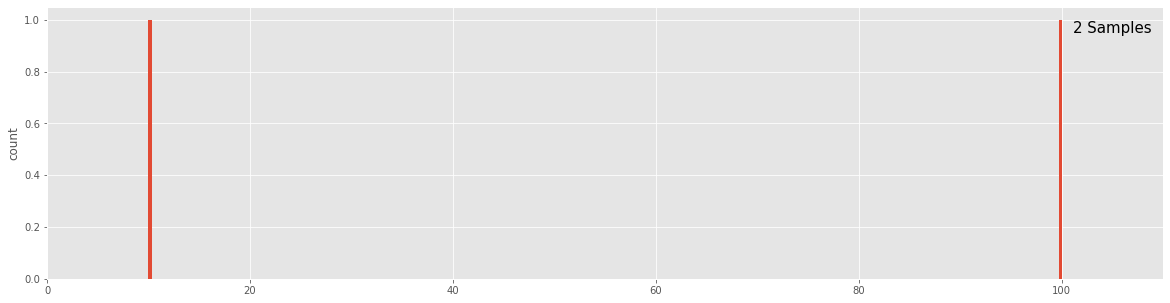

In [5]:
total = np.concatenate(DS_DATA)
ax = lin_plot(total, [])
plt.savefig("images/" + DS_NAME + "_distribution")

In [6]:
# Set prom thresholds
CLASSES[6].thresholds = np.linspace(0,150,16)

METHODS_SEL = [
 'exact',
 'prom',
 'hdr',
 'tdigest',
 'dd',
 'circllhist/type-1',
 'circllhist/type-7',
]

In [7]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .
Merge ...
Quantiles ...
# tdigest
Insert .
Merge ...
Quantiles ...
# hdr
Insert .
Merge ...
Quantiles ...
# dd
Insert .
Merge ...
Quantiles ...
# circllhist/type-1
Insert .
Merge ...
Quantiles ...
# circllhist/type-7
Insert .
Merge ...
Quantiles ...
# prom
Insert .
Merge ...
Quantiles ...


In [8]:
save(json.dumps(STATS), "results/" + DS_NAME + ".json")

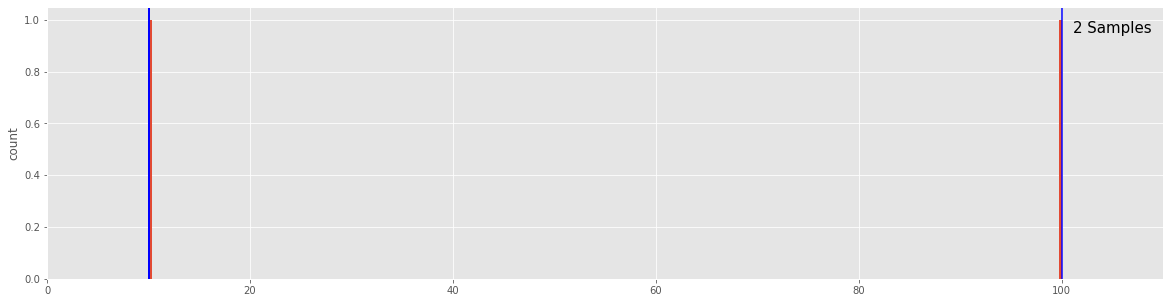

In [9]:
lin_plot(total, [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ])
plt.savefig("images/" + DS_NAME + "_distribution_percentiles")

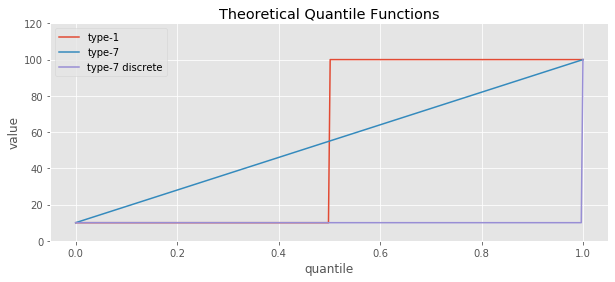

In [51]:
plt.figure(figsize=(10,4))
plt.title("Theoretical Quantile Functions")
plt.ylim(0, 120)
X = np.linspace(0,1,300)
plt.plot(X, (X<0.5) * 10 + ((X>=0.5) * 100), "-")
plt.plot(X, [ 10 + x * 90 for x in X ], "-")
plt.plot(X, (X<1) * 10 + ((X==1) * 100), "-")
plt.xlabel("quantile")
plt.ylabel("value")
plt.legend(["type-1", "type-7", "type-7 discrete"])

plt.savefig("images/quantile_comparison", bbox_inches="tight")

In [39]:
%run preamble_2.py
CLASSES[6].thresholds = np.linspace(0,150,1001)
reevaluate(STATS,"prom",  DS_DATA, DS_QUANTILES)

# prom
Insert .
Merge ...
Quantiles ...


<Figure size 432x288 with 0 Axes>

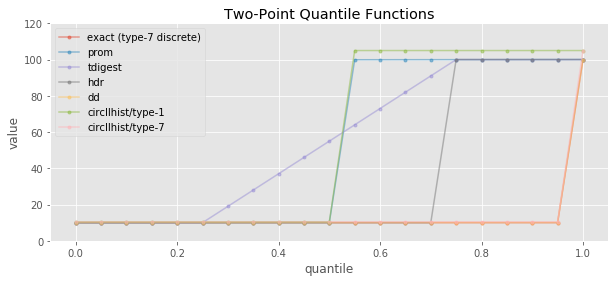

In [53]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS_SEL]

df.iloc[::2].to_latex("tables/" + DS_NAME + "_quantiles.tex", float_format="%.3f")

plt.figure(figsize=(10,4))
plt.title("Two-Point Quantile Functions")
for name in METHODS_SEL:
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,".-", alpha=0.5)

ML = METHODS_SEL.copy()
ML[0] = "exact (type-7 discrete)"
plt.legend(ML)
plt.ylim(0, 120)
plt.ylabel("value")
plt.xlabel("quantile")
plt.savefig("images/" + DS_NAME + "_quantile_comparison", bbox_inches="tight", )

# HTML(df.to_html())

In [41]:
df.iloc[::2]

,exact,prom,tdigest,hdr,dd,circllhist/type-1,circllhist/type-7
q0,10.0,9.90,10.0,9.999221,10.000000,10.5,10.5
q.1,10.0,9.93,10.0,10.005932,10.074697,10.5,10.5
q.2,10.0,9.96,10.0,10.005932,10.074697,10.5,10.5
q.3,10.0,9.99,19.0,10.005932,10.074697,10.5,10.5
q.4,10.0,10.02,37.0,10.005932,10.074697,10.5,10.5
q.5,10.0,10.05,55.0,10.005932,10.074697,10.5,10.5
q.6,10.0,99.93,73.0,10.005932,10.074697,105.0,10.5
q.7,10.0,99.96,91.0,10.005932,10.074697,105.0,10.5
q.8,10.0,99.99,100.0,100.019051,10.074697,105.0,10.5
q.9,10.0,100.02,100.0,100.019051,10.074697,105.0,10.5


Text(0.5, 1.0, 'Two Points / Size Comparison')

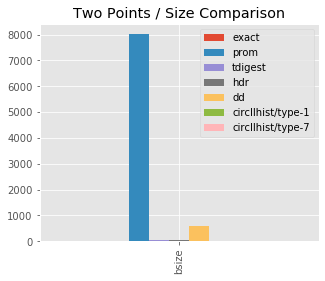

In [42]:
#
# Stats: Size
#
df = stats_size(STATS)[METHODS_SEL]

# save(df.to_latex(), "tables/" + DS_NAME + "_size.tex")

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.title(DS_NAME + " / Size Comparison")
# plt.savefig("images/" + DS_NAME + "_size")

In [43]:
df

,exact,prom,tdigest,hdr,dd,circllhist/type-1,circllhist/type-7
bsize,16,8016,64,42.0,605,12.0,12.0


Text(0.5, 1.0, 'Two Points / Performance Comparison')

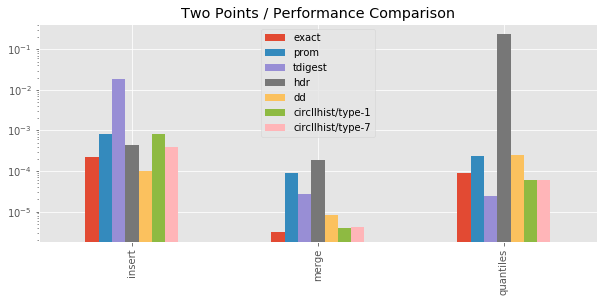

In [44]:
#
# Stast: Timing
#
df = stats_timing(STATS)[METHODS_SEL]

save(df.to_latex(), "tables/" + DS_NAME + "_perf.tex")

fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("log")
plt.title(DS_NAME + " / Performance Comparison")
# plt.savefig("images/" + DS_NAME + "_perf")

In [45]:
df

,exact,prom,tdigest,hdr,dd,circllhist/type-1,circllhist/type-7
insert,0.000216,0.000807,0.018123,0.000449,0.000102,0.000825,0.000384
merge,0.000003,0.000087,0.000027,0.000192,0.000008,0.000004,0.000004
quantiles,0.000088,0.000241,0.000024,0.239204,0.000256,0.000059,0.000060


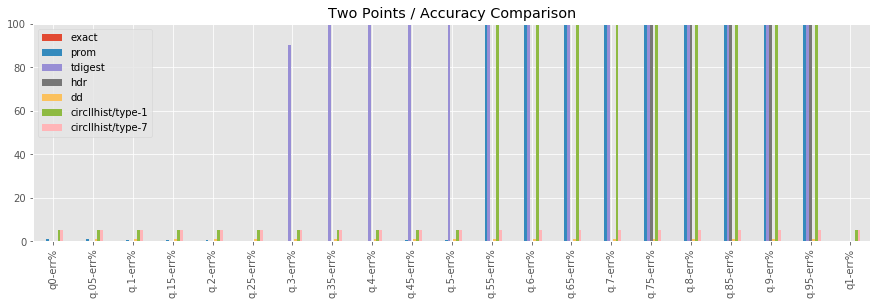

In [46]:
#
# Stats: Accuracy
#
df = stats_qerr(STATS)[METHODS_SEL]

save(df.to_latex(), "tables/" + DS_NAME + "_accuracy.tex")

fig = plt.figure(figsize=(15, 4))
ax = plt.subplot(1,1,1)
df.plot(kind="bar", ax=ax)
plt.yscale("linear")
plt.ylim(0, 100)
plt.title(DS_NAME + " / Accuracy Comparison")
plt.savefig("images/" + DS_NAME + "_accuracy")

In [47]:
df

,exact,prom,tdigest,hdr,dd,circllhist/type-1,circllhist/type-7
q0-err%,0.0,1.00,0.0,0.007793,0.000000,5.0,5.0
q.05-err%,0.0,0.85,0.0,0.059316,0.746967,5.0,5.0
q.1-err%,0.0,0.70,0.0,0.059316,0.746967,5.0,5.0
q.15-err%,0.0,0.55,0.0,0.059316,0.746967,5.0,5.0
q.2-err%,0.0,0.40,0.0,0.059316,0.746967,5.0,5.0
q.25-err%,0.0,0.25,0.0,0.059316,0.746967,5.0,5.0
q.3-err%,0.0,0.10,90.0,0.059316,0.746967,5.0,5.0
q.35-err%,0.0,0.05,180.0,0.059316,0.746967,5.0,5.0
q.4-err%,0.0,0.20,270.0,0.059316,0.746967,5.0,5.0
q.45-err%,0.0,0.35,360.0,0.059316,0.746967,5.0,5.0
